### Data Cleaning

**Steps to be followed**
1. **Completeness** - check at missing values and handle them
2. **Uniformity** - we will rename our columnsas well us cleaning our texts by removing punctuations capital letters as well as    hash tags 
3. **Tokenizing**
4. **Removing of stop words**
5. **Normalization** - through lemmatization,stemming and part of speech

In [1]:
# importing modules

# data manupulation
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# text cleaning
import string
import re
# nlp preprosessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.probability import FreqDist
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
# modelling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
#from keras.preprocessing.sequence import pad_sequences
#from keras.layers import Input, Dense, LSTM, Embedding
#from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
#from keras.models import Sequential
#from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
#from keras.preprocessing import text, sequence
#from tensorflow.keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [212]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [214]:
tweet = df['tweet_text']
tweet.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [215]:
#lets create a class data cleaniing

class DataCleaning:
    def __init__(self, df):
        self.df = df
    
    def missing_values(self):
        missing_values = self.df.isnull().sum()
        missing_percentage = (self.df.isnull().mean() * 100)
        return missing_percentage
    
    def change_col_name(self):
        self.df = self.df.rename({'tweet_text': 'tweet', 
                              'emotion_in_tweet_is_directed_at': 'product', 
                              'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, 
                             axis=1)
        return self.df
    @staticmethod
    def clean_tweet(tweet):
        if isinstance(tweet, str):
            tweet = tweet.lower()
            tweet = re.sub(r'[^\w\s]', '', tweet)
            tweet = re.sub(r'\s+', ' ', tweet).strip()
            tweet = re.sub(r'@\w+', '', tweet)
            tweet = re.sub(r'\b\d+\b', '', tweet)#removing stand alone numbers but remaining numbers intergrete in the words
        return tweet
 
    
    


**Competeness**

In [216]:
# instatiating the datacleaning class
clean_df = DataCleaning(df)
missing_percentages = clean_df.missing_values()
missing_percentages

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

We have a insignificant null values in the 'tweet_text' column which would not affect our dataset so we will drop the null value we also have a large percentage of null values in the 'emotion_in_tweet_is_directed_at' column which does not affect us much since we will not be using the column for modelling purpose as well as analysis

In [219]:
df.duplicated().sum()

22

In [217]:
df[df.duplicated()]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


In [220]:
# Identify all rows that are duplicates
duplicates = df[df.duplicated(keep=False)]

# Display the duplicates
print("Rows that contain duplicates and the duplicates:")
print(duplicates)

Rows that contain duplicates and the duplicates:
                                             tweet_text  \
7     #SXSW is just starting, #CTIA is around the co...   
9     Counting down the days to #sxsw plus strong Ca...   
17    I just noticed DST is coming this weekend. How...   
20    Need to buy an iPad2 while I'm in Austin at #s...   
21    Oh. My. God. The #SXSW app for iPad is pure, u...   
24    Really enjoying the changes in Gowalla 3.0 for...   
466      Before It Even Begins, Apple Wins #SXSW {link}   
468      Before It Even Begins, Apple Wins #SXSW {link}   
774   Google to Launch Major New Social Network Call...   
776   Google to Launch Major New Social Network Call...   
2230  Marissa Mayer: Google Will Connect the Digital...   
2232  Marissa Mayer: Google Will Connect the Digital...   
2559  Counting down the days to #sxsw plus strong Ca...   
3950  Really enjoying the changes in Gowalla 3.0 for...   
3962  #SXSW is just starting, #CTIA is around the co...   
4897  O

In [181]:
df.dropna(subset=['tweet_text'], inplace=True)
df.shape

KeyError: ['tweet_text']

Null values in 'tweet_text' dropped

**Uniformity**

In [182]:
# # changing columns names by calling the class method
df = clean_df.change_col_name()
df 

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"['wesley83', 'i', 'have', 'a', '3g', 'iphone',...","['wesley83', '3g', 'iphone', 'hrs', 'tweeting'...",wesley83 3g iphone hr tweeting rise_austin dea...,"[iphone, hr, tweeting, dead, need, upgrade, pl...","[iphone, hr, need, plugin, station]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"['jessedee', 'know', 'about', 'fludapp', 'awes...","['jessedee', 'know', 'fludapp', 'awesome', 'ip...",jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, ipadiphone, youll, appreciate, desi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also they sh...,"['swonderlin', 'can', 'not', 'wait', 'for', 'i...","['swonderlin', 'wait', 'ipad', 'also', 'sale',...",swonderlin wait ipad also sale sxsw,"[swonderlin, wait, also, sale]","[swonderlin, wait, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"['sxsw', 'i', 'hope', 'this', 'years', 'festiv...","['sxsw', 'hope', 'years', 'festival', 'isnt', ...",sxsw hope year festival isnt crashy year iphon...,"[hope, year, festival, isnt, crashy, year, iph...","[hope, year, festival, isnt, year, iphone]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"['sxtxstate', 'great', 'stuff', 'on', 'fri', '...","['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, stuff, fri, mayer, tim, booksconfe..."
...,...,...,...,...,...,...,...,...,...
9087,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,"['ipad', 'everywhere', 'sxsw', 'link']","['ipad', 'everywhere', 'sxsw', 'link']",ipad everywhere sxsw link,[everywhere],[]
9088,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt mention we interrupt your regular...,"['wave', 'buzz', 'rt', 'mention', 'we', 'inter...","['wave', 'buzz', 'rt', 'mention', 'interrupt',...",wave buzz rt mention interrupt regularly sched...,"[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, geek, news]"
9089,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,googles zeiger a physician never reported pote...,"['googles', 'zeiger', 'a', 'physician', 'never...","['googles', 'zeiger', 'physician', 'never', 'r...",google zeiger physician never reported potenti...,"[google, zeiger, physician, never, reported, p...","[google, zeiger, physician, ae, relies, wout, ..."
9090,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,some verizon iphone customers complained their...,"['some', 'verizon', 'iphone', 'customers', 'co...","['verizon', 'iphone', 'customers', 'complained...",verizon iphone customer complained time fell b...,"[verizon, iphone, customer, complained, time, ...","[verizon, iphone, customer, time, hour, weeken..."


In [183]:
# doing text cleaning  by removing @, punctuation ,uppercase by hep of our class method
df['cleaned_tweet'] = df['tweet'].apply(DataCleaning.clean_tweet)
df['cleaned_tweet'].head()

0    wesley83 i have a 3g iphone after  hrs tweetin...
1    jessedee know about fludapp awesome ipadiphone...
2    swonderlin can not wait for ipad  also they sh...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: cleaned_tweet, dtype: object

In [184]:
df

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"['wesley83', 'i', 'have', 'a', '3g', 'iphone',...","['wesley83', '3g', 'iphone', 'hrs', 'tweeting'...",wesley83 3g iphone hr tweeting rise_austin dea...,"[iphone, hr, tweeting, dead, need, upgrade, pl...","[iphone, hr, need, plugin, station]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"['jessedee', 'know', 'about', 'fludapp', 'awes...","['jessedee', 'know', 'fludapp', 'awesome', 'ip...",jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, ipadiphone, youll, appreciate, desi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also they sh...,"['swonderlin', 'can', 'not', 'wait', 'for', 'i...","['swonderlin', 'wait', 'ipad', 'also', 'sale',...",swonderlin wait ipad also sale sxsw,"[swonderlin, wait, also, sale]","[swonderlin, wait, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"['sxsw', 'i', 'hope', 'this', 'years', 'festiv...","['sxsw', 'hope', 'years', 'festival', 'isnt', ...",sxsw hope year festival isnt crashy year iphon...,"[hope, year, festival, isnt, crashy, year, iph...","[hope, year, festival, isnt, year, iphone]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"['sxtxstate', 'great', 'stuff', 'on', 'fri', '...","['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, stuff, fri, mayer, tim, booksconfe..."
...,...,...,...,...,...,...,...,...,...
9087,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,"['ipad', 'everywhere', 'sxsw', 'link']","['ipad', 'everywhere', 'sxsw', 'link']",ipad everywhere sxsw link,[everywhere],[]
9088,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt mention we interrupt your regular...,"['wave', 'buzz', 'rt', 'mention', 'we', 'inter...","['wave', 'buzz', 'rt', 'mention', 'interrupt',...",wave buzz rt mention interrupt regularly sched...,"[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, geek, news]"
9089,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,googles zeiger a physician never reported pote...,"['googles', 'zeiger', 'a', 'physician', 'never...","['googles', 'zeiger', 'physician', 'never', 'r...",google zeiger physician never reported potenti...,"[google, zeiger, physician, never, reported, p...","[google, zeiger, physician, ae, relies, wout, ..."
9090,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,some verizon iphone customers complained their...,"['some', 'verizon', 'iphone', 'customers', 'co...","['verizon', 'iphone', 'customers', 'complained...",verizon iphone customer complained time fell b...,"[verizon, iphone, customer, complained, time, ...","[verizon, iphone, customer, time, hour, weeken..."


**Tokenization**

In [185]:
#lets create a function to tokenize our cleaned_tweet 
def tokenize_text(cleaned_tweet):
    return word_tokenize(cleaned_tweet)

# Applying the tokenize_tweet function
df['tokenized_tweet'] = df['cleaned_tweet'].apply(word_tokenize)
df.head()

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"[wesley83, i, have, a, 3g, iphone, after, hrs,...","['wesley83', '3g', 'iphone', 'hrs', 'tweeting'...",wesley83 3g iphone hr tweeting rise_austin dea...,"[iphone, hr, tweeting, dead, need, upgrade, pl...","[iphone, hr, need, plugin, station]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","['jessedee', 'know', 'fludapp', 'awesome', 'ip...",jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, ipadiphone, youll, appreciate, desi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also they sh...,"[swonderlin, can, not, wait, for, ipad, also, ...","['swonderlin', 'wait', 'ipad', 'also', 'sale',...",swonderlin wait ipad also sale sxsw,"[swonderlin, wait, also, sale]","[swonderlin, wait, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","['sxsw', 'hope', 'years', 'festival', 'isnt', ...",sxsw hope year festival isnt crashy year iphon...,"[hope, year, festival, isnt, crashy, year, iph...","[hope, year, festival, isnt, year, iphone]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, stuff, fri, mayer, tim, booksconfe..."


**Removing of stopwords**

In [186]:
# instastiating the stopwords as well as creating and applying a function to remove stop words

sw = set(stopwords.words('english'))

def remove_stopwords(tokenized_tweet):
    return [i for i in tokenized_tweet if i not in sw]
         
df['removed_stop_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df.head()         
         


,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"[wesley83, i, have, a, 3g, iphone, after, hrs,...","[wesley83, 3g, iphone, hrs, tweeting, rise_aus...",wesley83 3g iphone hr tweeting rise_austin dea...,"[iphone, hr, tweeting, dead, need, upgrade, pl...","[iphone, hr, need, plugin, station]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...",jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, ipadiphone, youll, appreciate, desi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also they sh...,"[swonderlin, can, not, wait, for, ipad, also, ...","[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw,"[swonderlin, wait, also, sale]","[swonderlin, wait, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...",sxsw hope year festival isnt crashy year iphon...,"[hope, year, festival, isnt, crashy, year, iph...","[hope, year, festival, isnt, year, iphone]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, stuff, fri, mayer, tim, booksconfe..."


**Normalization**

In [187]:
new_df = df.copy()
#lets lemmetize
lemmatizer = WordNetLemmatizer()

def lemmatize_text(removed_stop_tweet) :
    return [lemmatizer.lemmatize(word) for word in removed_stop_tweet ]

new_df['lemmatized_tweet'] = new_df['removed_stop_tweet'].apply(lemmatize_text)
new_df.head()


,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"[wesley83, i, have, a, 3g, iphone, after, hrs,...","[wesley83, 3g, iphone, hrs, tweeting, rise_aus...","[wesley83, 3g, iphone, hr, tweeting, rise_aust...","[iphone, hr, tweeting, dead, need, upgrade, pl...","[iphone, hr, need, plugin, station]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, ipadiphone, youll, appreciate, desi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also they sh...,"[swonderlin, can, not, wait, for, ipad, also, ...","[swonderlin, wait, ipad, also, sale, sxsw]","[swonderlin, wait, ipad, also, sale, sxsw]","[swonderlin, wait, also, sale]","[swonderlin, wait, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festival, isnt, crashy, yea...","[hope, year, festival, isnt, crashy, year, iph...","[hope, year, festival, isnt, year, iphone]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...","[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, stuff, fri, mayer, tim, booksconfe..."


In [188]:
new_df['lemmatized_tweet'] = new_df['lemmatized_tweet'].apply(lambda x: ' '.join(x))



In [189]:
new_df.to_csv('cleaned_dataset.csv', index=False)

### Explanatory Data Analysis

#### A barplot

In [190]:
! ls

LICENSE
README.md
Untitled.ipynb
Untitled1.ipynb
best_model.pkl
cleaned_dataset.csv
filtered_reviews.csv
judge-1377884607_tweet_product_company.csv
nlp_project.ipynb
practice.ipynb


In [191]:
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"['wesley83', 'i', 'have', 'a', '3g', 'iphone',...","['wesley83', '3g', 'iphone', 'hrs', 'tweeting'...",wesley83 3g iphone hr tweeting rise_austin dea...,"['iphone', 'hr', 'tweeting', 'dead', 'need', '...","['iphone', 'hr', 'need', 'plugin', 'station']"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"['jessedee', 'know', 'about', 'fludapp', 'awes...","['jessedee', 'know', 'fludapp', 'awesome', 'ip...",jessedee know fludapp awesome ipadiphone app y...,"['jessedee', 'know', 'fludapp', 'awesome', 'ip...","['jessedee', 'ipadiphone', 'youll', 'appreciat..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also they sh...,"['swonderlin', 'can', 'not', 'wait', 'for', 'i...","['swonderlin', 'wait', 'ipad', 'also', 'sale',...",swonderlin wait ipad also sale sxsw,"['swonderlin', 'wait', 'also', 'sale']","['swonderlin', 'wait', 'sale']"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"['sxsw', 'i', 'hope', 'this', 'years', 'festiv...","['sxsw', 'hope', 'years', 'festival', 'isnt', ...",sxsw hope year festival isnt crashy year iphon...,"['hope', 'year', 'festival', 'isnt', 'crashy',...","['hope', 'year', 'festival', 'isnt', 'year', '..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"['sxtxstate', 'great', 'stuff', 'on', 'fri', '...","['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",sxtxstate great stuff fri sxsw marissa mayer g...,"['sxtxstate', 'great', 'stuff', 'fri', 'mariss...","['sxtxstate', 'stuff', 'fri', 'mayer', 'tim', ..."


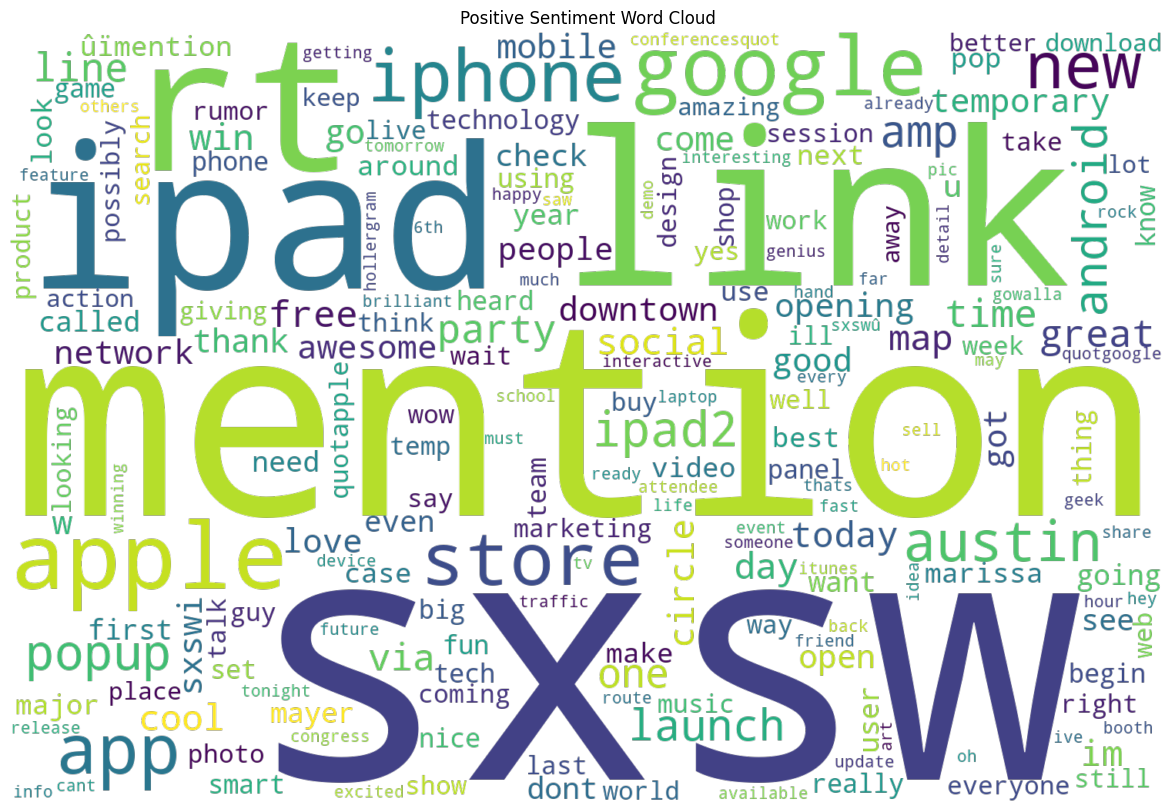

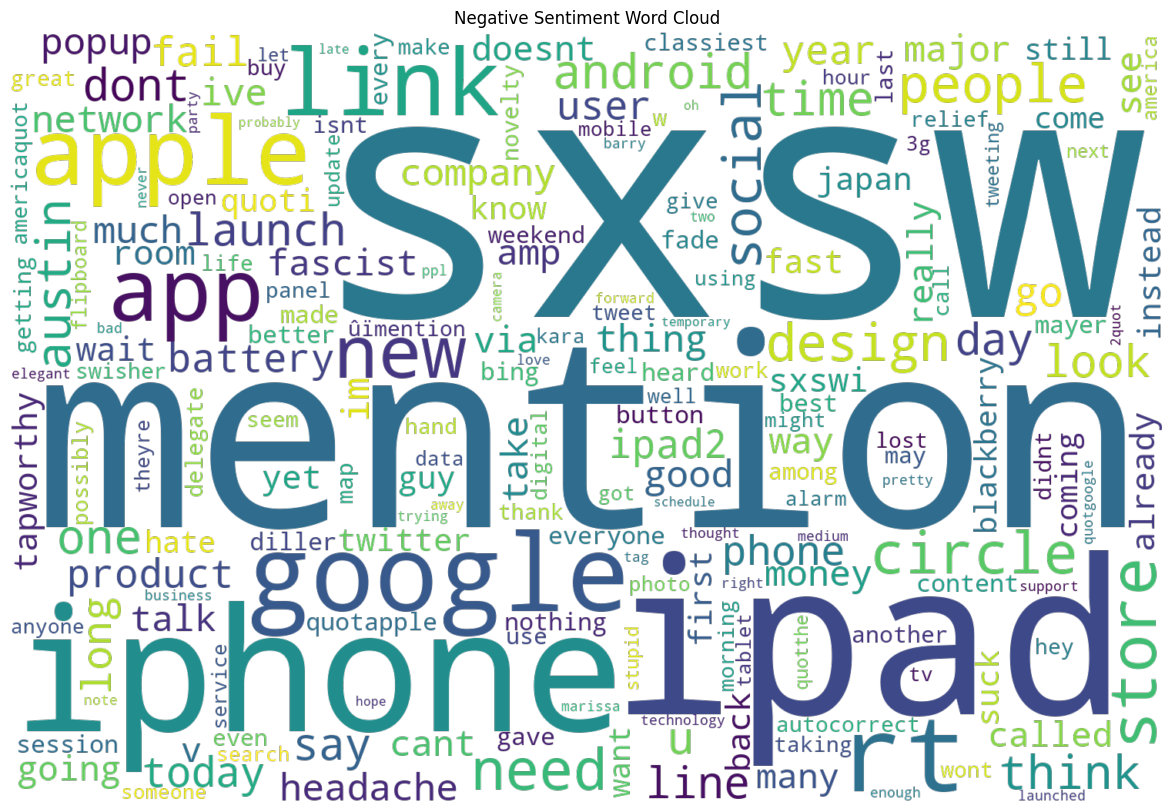

In [192]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Assuming your DataFrame is named df
# Create lists to hold positive and negative tweets
positive_tweets = df[df['emotion'] == 'Positive emotion']['lemmatized_tweet'].tolist()
negative_tweets = df[df['emotion'] == 'Negative emotion']['lemmatized_tweet'].tolist()

# Function to clean and join tweets for word cloud generation
def clean_and_join(tweets):
    return ' '.join(tweets)

# Create word clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(
        mode="RGBA",
        collocations=False,
        background_color=None,
        width=1500,
        height=1000
    ).generate(text)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate and plot word clouds
positive_text = clean_and_join(positive_tweets)
negative_text = clean_and_join(negative_tweets)

plot_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
plot_word_cloud(negative_text, 'Negative Sentiment Word Cloud')


In [193]:
# Define domain-specific stopwords
domain_specific_stopwords = [
    'sxsw', 'mention', 'link', 'rt', 'ipad', 'google', 'apple', 'store',
    'austin', 'app', 'amp', 'social', 'circles', 'popup', 'android',
    'network', 'via'
]


In [194]:
# Update the stopwords list
combined_stopwords = stop_words.union(domain_specific_stopwords)


In [195]:
# Function to clean text with updated stopwords
def clean_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in combined_stopwords]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply cleaning function to your dataset
df['cleaned_tokens'] = df['cleaned_tweet'].apply(clean_text)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define domain-specific stopwords
domain_specific_stopwords = [
    'sxsw', 'mention', 'link', 'rt', 'ipad', 'google', 'apple', 'store',
    'austin', 'app', 'amp', 'social', 'circles', 'popup', 'android',
    'network', 'via', 'sxswi'
]

# Update the stopwords list
combined_stopwords = stop_words.union(domain_specific_stopwords)

# Function to clean text with updated stopwords
def clean_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in combined_stopwords]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply cleaning function to your dataset
df['cleaned_tokens'] = df['cleaned_tweet'].apply(clean_text)

# Function to extract nouns
def extract_nouns(tokens):
    tagged_tokens = pos_tag(tokens)
    nouns = [word for word, tag in tagged_tokens if tag.startswith('NN')]
    return nouns

# Apply noun extraction function
df['nouns'] = df['cleaned_tokens'].apply(extract_nouns)

# Filter positive and negative sentiments
positive_nouns = df[df['emotion'] == 'Positive emotion']['nouns'].sum()
negative_nouns = df[df['emotion'] == 'Negative emotion']['nouns'].sum()

# Function to generate and plot word cloud
def plot_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds
plot_wordcloud(positive_nouns, 'Positive Sentiment Word Cloud')
plot_wordcloud(negative_nouns, 'Negative Sentiment Word Cloud')


In [86]:
df

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"['wesley83', 'i', 'have', 'a', '3g', 'iphone',...","['wesley83', '3g', 'iphone', 'hrs', 'tweeting'...",wesley83 3g iphone hr tweeting rise_austin dea...,"[iphone, hr, tweeting, dead, need, upgrade, pl...","[iphone, hr, need, plugin, station]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"['jessedee', 'know', 'about', 'fludapp', 'awes...","['jessedee', 'know', 'fludapp', 'awesome', 'ip...",jessedee know fludapp awesome ipadiphone app y...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, ipadiphone, youll, appreciate, desi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also they sh...,"['swonderlin', 'can', 'not', 'wait', 'for', 'i...","['swonderlin', 'wait', 'ipad', 'also', 'sale',...",swonderlin wait ipad also sale sxsw,"[swonderlin, wait, also, sale]","[swonderlin, wait, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"['sxsw', 'i', 'hope', 'this', 'years', 'festiv...","['sxsw', 'hope', 'years', 'festival', 'isnt', ...",sxsw hope year festival isnt crashy year iphon...,"[hope, year, festival, isnt, crashy, year, iph...","[hope, year, festival, isnt, year, iphone]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"['sxtxstate', 'great', 'stuff', 'on', 'fri', '...","['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",sxtxstate great stuff fri sxsw marissa mayer g...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, stuff, fri, mayer, tim, booksconfe..."
...,...,...,...,...,...,...,...,...,...
9087,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,"['ipad', 'everywhere', 'sxsw', 'link']","['ipad', 'everywhere', 'sxsw', 'link']",ipad everywhere sxsw link,[everywhere],[]
9088,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt mention we interrupt your regular...,"['wave', 'buzz', 'rt', 'mention', 'we', 'inter...","['wave', 'buzz', 'rt', 'mention', 'interrupt',...",wave buzz rt mention interrupt regularly sched...,"[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, geek, news]"
9089,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,googles zeiger a physician never reported pote...,"['googles', 'zeiger', 'a', 'physician', 'never...","['googles', 'zeiger', 'physician', 'never', 'r...",google zeiger physician never reported potenti...,"[google, zeiger, physician, never, reported, p...","[google, zeiger, physician, ae, relies, wout, ..."
9090,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,some verizon iphone customers complained their...,"['some', 'verizon', 'iphone', 'customers', 'co...","['verizon', 'iphone', 'customers', 'complained...",verizon iphone customer complained time fell b...,"[verizon, iphone, customer, complained, time, ...","[verizon, iphone, customer, time, hour, weeken..."


### MY Modelling

In [87]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Define the emotions you want to keep
desired_emotions = ['Positive emotion', 'Negative emotion', 'No emotion toward brand or product']

# Filter the DataFrame to include only the desired emotions
filtered_df = df[df['emotion'].isin(desired_emotions)]

# Verify the new DataFrame
print(f"Original DataFrame size: {df.shape}")
print(f"Filtered DataFrame size: {filtered_df.shape}")

# Check the distribution of emotions in the filtered DataFrame
emotion_distribution = filtered_df['emotion'].value_counts()
print("Emotion distribution in the filtered DataFrame:")
print(emotion_distribution)

# Save the filtered DataFrame to a new file if needed
filtered_df.to_csv('filtered_reviews.csv', index=False)


Original DataFrame size: (9092, 9)
Filtered DataFrame size: (8936, 9)
Emotion distribution in the filtered DataFrame:
emotion
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: count, dtype: int64


### a. Oversampling the Minority Class
Increase the number of samples in the minority class (e.g., Positive emotion and Negative emotion) to balance the dataset.

In [88]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = filtered_df[filtered_df['emotion'] == 'No emotion toward brand or product']
minority_classes = filtered_df[filtered_df['emotion'] != 'No emotion toward brand or product']

# Upsample minority classes
minority_classes_upsampled = resample(minority_classes,
                                      replace=True,  # Sample with replacement
                                      n_samples=len(majority_class),  # Match majority class
                                      random_state=42)  # For reproducibility

# Combine majority class with upsampled minority classes
balanced_df = pd.concat([majority_class, minority_classes_upsampled])

# Verify the new distribution
print("Emotion distribution in the balanced DataFrame:")
print(balanced_df['emotion'].value_counts())


Emotion distribution in the balanced DataFrame:
emotion
No emotion toward brand or product    5388
Positive emotion                      4491
Negative emotion                       897
Name: count, dtype: int64


### b. Undersampling the Majority Class
Reduce the number of samples in the majority class (e.g., No emotion toward brand or product) to balance the dataset.

In [89]:
# Downsample the majority class
majority_class_downsampled = resample(majority_class,
                                      replace=False,  # Sample without replacement
                                      n_samples=len(minority_classes),  # Match minority class size
                                      random_state=42)  # For reproducibility

# Combine downsampled majority class with minority classes
balanced_df = pd.concat([majority_class_downsampled, minority_classes])

# Verify the new distribution
print("Emotion distribution in the balanced DataFrame:")
print(balanced_df['emotion'].value_counts())


Emotion distribution in the balanced DataFrame:
emotion
No emotion toward brand or product    3548
Positive emotion                      2978
Negative emotion                       570
Name: count, dtype: int64


In [85]:
balanced_df.head()

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns
5621,RT @mention CNN to launch &quot;TV everywhere&...,NaN,No emotion toward brand or product,rt mention cnn to launch quottv everywherequot...,"['rt', 'mention', 'cnn', 'to', 'launch', 'quot...","['rt', 'mention', 'cnn', 'launch', 'quottv', '...",rt mention cnn launch quottv everywherequot se...,"[cnn, launch, quottv, everywherequot, service,...","[cnn, launch, quottv, everywherequot, service,..."
6693,RT @mention sure to be a total scene! RT @ment...,NaN,No emotion toward brand or product,rt mention sure to be a total scene rt mention...,"['rt', 'mention', 'sure', 'to', 'be', 'a', 'to...","['rt', 'mention', 'sure', 'total', 'scene', 'r...",rt mention sure total scene rt mention spoke a...,"[sure, total, scene, spoke, cautiously, optimi...","[scene, nerd]"
7317,#apple pop up store making an appearance for #...,NaN,No emotion toward brand or product,apple pop up store making an appearance for au...,"['apple', 'pop', 'up', 'store', 'making', 'an'...","['apple', 'pop', 'store', 'making', 'appearanc...",apple pop store making appearance austin sxsw ...,"[pop, making, appearance]","[pop, appearance]"
886,"At Red 7, Mist Giant dope! Interviewed Adi fro...",NaN,No emotion toward brand or product,at red mist giant dope interviewed adi from t...,"['at', 'red', 'mist', 'giant', 'dope', 'interv...","['red', 'mist', 'giant', 'dope', 'interviewed'...",red mist giant dope interviewed adi mind adi m...,"[red, mist, giant, dope, interviewed, adi, min...","[mist, giant, dope, mind, minute, cat, pic, lo..."
1289,is anyone using google checkins thru latitude?...,NaN,No emotion toward brand or product,is anyone using google checkins thru latitude ...,"['is', 'anyone', 'using', 'google', 'checkins'...","['anyone', 'using', 'google', 'checkins', 'thr...",anyone using google checkins thru latitude sxsw,"[anyone, using, checkins, thru, latitude]","[anyone, checkins, latitude]"


In [90]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_encoder = LabelEncoder()

# Fit and transform the 'emotion' column in balanced_df
balanced_df['emotion_encoded'] = le_encoder.fit_transform(balanced_df['emotion'])

# Verify the changes
balanced_df.head()


,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,cleaned_tokens,nouns,emotion_encoded
5621,RT @mention CNN to launch &quot;TV everywhere&...,NaN,No emotion toward brand or product,rt mention cnn to launch quottv everywherequot...,"['rt', 'mention', 'cnn', 'to', 'launch', 'quot...","['rt', 'mention', 'cnn', 'launch', 'quottv', '...",rt mention cnn launch quottv everywherequot se...,"[cnn, launch, quottv, everywherequot, service,...","[cnn, launch, quottv, everywherequot, service,...",1
6693,RT @mention sure to be a total scene! RT @ment...,NaN,No emotion toward brand or product,rt mention sure to be a total scene rt mention...,"['rt', 'mention', 'sure', 'to', 'be', 'a', 'to...","['rt', 'mention', 'sure', 'total', 'scene', 'r...",rt mention sure total scene rt mention spoke a...,"[sure, total, scene, spoke, cautiously, optimi...","[scene, nerd]",1
7317,#apple pop up store making an appearance for #...,NaN,No emotion toward brand or product,apple pop up store making an appearance for au...,"['apple', 'pop', 'up', 'store', 'making', 'an'...","['apple', 'pop', 'store', 'making', 'appearanc...",apple pop store making appearance austin sxsw ...,"[pop, making, appearance]","[pop, appearance]",1
886,"At Red 7, Mist Giant dope! Interviewed Adi fro...",NaN,No emotion toward brand or product,at red mist giant dope interviewed adi from t...,"['at', 'red', 'mist', 'giant', 'dope', 'interv...","['red', 'mist', 'giant', 'dope', 'interviewed'...",red mist giant dope interviewed adi mind adi m...,"[red, mist, giant, dope, interviewed, adi, min...","[mist, giant, dope, mind, minute, cat, pic, lo...",1
1289,is anyone using google checkins thru latitude?...,NaN,No emotion toward brand or product,is anyone using google checkins thru latitude ...,"['is', 'anyone', 'using', 'google', 'checkins'...","['anyone', 'using', 'google', 'checkins', 'thr...",anyone using google checkins thru latitude sxsw,"[anyone, using, checkins, thru, latitude]","[anyone, checkins, latitude]",1


### Logistic regression base model

In [91]:
#split our data into test split
#vectorizer = TfidfVectorizer()

X = balanced_df['lemmatized_tweet']
y = balanced_df['emotion_encoded']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [94]:
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Create the pipeline
log_pipeline = imPipeline([
    ('vectorizer', TfidfVectorizer()),         
    ('smote', SMOTE(random_state=42)),       
    ('classifier', LogisticRegression())   
])

# Perform cross-validation
cv_scores = cross_val_score(log_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Cross val Mean Accuracy: {cv_scores.mean()}')

# Fit the pipeline on the training data and evaluate
log_pipeline.fit(X_train, y_train)
log_pred = log_pipeline.predict(X_test)

# Print evaluation metrics
print('Accuracy score:', metrics.accuracy_score(y_test, log_pred))
print('Recall score:', metrics.recall_score(y_test, log_pred, average='weighted'))
print('F1 score:', metrics.f1_score(y_test, log_pred, average='weighted'))


Cross-Validation Accuracy Scores: [0.63380282 0.64507042 0.64755639 0.64097744 0.63157895]
Cross val Mean Accuracy: 0.6397972042783013
Accuracy score: 0.6431792559188275
Recall score: 0.6431792559188275
F1 score: 0.6479320744232983


In [47]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Convert classes list to numpy array
# classes = np.array([0, 1, 2])

# # Compute class weights
# class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
# class_weights_dict = dict(enumerate(class_weights))

# # Initialize the model with the computed class weights
# model = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)

# # Train the model
# model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 5.366366366366367,
                                     1: 0.5548827821766806,
                                     2: 0.98865836791148},
                       random_state=42)

In [55]:
# from sklearn.model_selection import GridSearchCV

# # Example Grid Search for RandomForestClassifier
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# print("Best Parameters:", grid_search.best_params_)


In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score

# # Compute ROC curve and AUC for each class
# fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
# auc_score = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title(f'ROC Curve (AUC = {auc_score:.2f})')
# plt.show()


In [ ]:
# label encoding of the target variable emotions

le_encoder = LabelEncoder()

combined_df['emotion_encoded'] = le_encoder.fit_transform(combined_df['emotion'])

combined_df.head()

### Modelling

We will create  a new data frame containing values whom emotion is 'postive','negative' and  'no emotion towards the brand' hence we will drop the 'i can't tell emotion' coz its had the least number of records of about 2% of the dataset which is insignificant and won't affect our dataset




In [98]:
#creating the new dataframes
model_df = new_df.copy()
neg_df = model_df[model_df['emotion']=='Negative emotion']
pos_df = model_df[model_df['emotion']=='Positive emotion']
neutral_df = model_df[model_df['emotion']=='No emotion toward brand or product']

In [99]:
#combining the datasets
combined_df = pd.concat([neg_df,pos_df,neutral_df] ,axis=0)
combined_df.head(10)

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"[wesley83, i, have, a, 3g, iphone, after, hrs,...","[wesley83, 3g, iphone, hrs, tweeting, rise_aus...",wesley83 3g iphone hr tweeting rise_austin dea...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...",sxsw hope year festival isnt crashy year iphon...
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,i just noticed dst is coming this weekend how ...,"[i, just, noticed, dst, is, coming, this, week...","[noticed, dst, coming, weekend, many, iphone, ...",noticed dst coming weekend many iphone user ho...
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion,mention false alarm google circles not coming ...,"[mention, false, alarm, google, circles, not, ...","[mention, false, alarm, google, circles, comin...",mention false alarm google circle coming nowûò...
64,Again? RT @mention Line at the Apple store is ...,NaN,Negative emotion,again rt mention line at the apple store is in...,"[again, rt, mention, line, at, the, apple, sto...","[rt, mention, line, apple, store, insane, sxsw]",rt mention line apple store insane sxsw
67,attending @mention iPad design headaches #sxsw...,iPad,Negative emotion,attending mention ipad design headaches sxsw link,"[attending, mention, ipad, design, headaches, ...","[attending, mention, ipad, design, headaches, ...",attending mention ipad design headache sxsw link
68,Boooo! RT @mention Flipboard is developing an ...,NaN,Negative emotion,boooo rt mention flipboard is developing an ip...,"[boooo, rt, mention, flipboard, is, developing...","[boooo, rt, mention, flipboard, developing, ip...",boooo rt mention flipboard developing iphone v...
92,What !?!? @mention #SXSW does not provide iPh...,iPhone,Negative emotion,what mention sxsw does not provide iphone char...,"[what, mention, sxsw, does, not, provide, ipho...","[mention, sxsw, provide, iphone, chargers, ive...",mention sxsw provide iphone charger ive change...
103,Know that &quot;dataviz&quot; translates to &q...,NaN,Negative emotion,know that quotdatavizquot translates to quotsa...,"[know, that, quotdatavizquot, translates, to, ...","[know, quotdatavizquot, translates, quotsatani...",know quotdatavizquot translates quotsatanicquo...
170,Seriously #sxsw? Did you do any testing on the...,iPad or iPhone App,Negative emotion,seriously sxsw did you do any testing on the m...,"[seriously, sxsw, did, you, do, any, testing, ...","[seriously, sxsw, testing, mobile, apps, const...",seriously sxsw testing mobile apps constant ip...


In [100]:
# assessing the target value counts
combined_df.emotion.value_counts()

emotion
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: count, dtype: int64

There seems to be a huge class imblance between the 3 classes which we will correct later on

In [101]:
# label encoding of the target variable emotions

le_encoder = LabelEncoder()

combined_df['emotion_encoded'] = le_encoder.fit_transform(combined_df['emotion'])

combined_df.head()




,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,emotion_encoded
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after hrs tweetin...,"[wesley83, i, have, a, 3g, iphone, after, hrs,...","[wesley83, 3g, iphone, hrs, tweeting, rise_aus...",wesley83 3g iphone hr tweeting rise_austin dea...,0
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...",sxsw hope year festival isnt crashy year iphon...,0
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,i just noticed dst is coming this weekend how ...,"[i, just, noticed, dst, is, coming, this, week...","[noticed, dst, coming, weekend, many, iphone, ...",noticed dst coming weekend many iphone user ho...,0
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion,mention false alarm google circles not coming ...,"[mention, false, alarm, google, circles, not, ...","[mention, false, alarm, google, circles, comin...",mention false alarm google circle coming nowûò...,0
64,Again? RT @mention Line at the Apple store is ...,NaN,Negative emotion,again rt mention line at the apple store is in...,"[again, rt, mention, line, at, the, apple, sto...","[rt, mention, line, apple, store, insane, sxsw]",rt mention line apple store insane sxsw,0


In [104]:
combined_df['emotion_encoded'].value_counts()

emotion_encoded
1    5388
2    2978
0     570
Name: count, dtype: int64

In [51]:
#split our data into test split
#vectorizer = TfidfVectorizer()

X = combined_df['lemmatized_tweet']
y = combined_df['emotion_encoded']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [106]:

from sklearn.preprocessing import LabelEncoder

# Filter the DataFrame to include only 'Positive emotion' and 'Negative emotion'
binary_df = combined_df[combined_df['emotion'].isin(['Positive emotion', 'Negative emotion'])]

# Initialize LabelEncoder
le_encoder = LabelEncoder()

# Encode 'Positive emotion' as 1 and 'Negative emotion' as 0
binary_df['emotion_encoded'] = le_encoder.fit_transform(binary_df['emotion'])

# Display the distribution of encoded emotions
print(binary_df['emotion_encoded'].value_counts())

# If you want to check the mapping of labels to encoded values
print(dict(zip(le_encoder.classes_, le_encoder.transform(le_encoder.classes_))))


emotion_encoded
1    2978
0     570
Name: count, dtype: int64
{'Negative emotion': 0, 'Positive emotion': 1}


C:\Users\Ian\AppData\Local\Temp\ipykernel_17544\4082378230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_df['emotion_encoded'] = le_encoder.fit_transform(binary_df['emotion'])


## Binary Classification

**Logistic regression base model**

In [120]:
# Step 2: Split the data into training and test sets
X = binary_df['tweet']
y = binary_df['emotion_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the pipeline with SMOTE and Logistic Regression
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         
    ('smote', SMOTE(random_state=42)),       
    ('classifier', LogisticRegression())   
])

clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

## Evaluating 

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test, pos_label=1):
    """
    Evaluate the performance of a classification model, including confusion matrix, classification report, ROC curve, and AUC.

    Parameters:
    clf_pipe (Pipeline): The trained classifier pipeline.
    X_train (array-like): The training data.
    y_train (array-like): The true labels for the training data.
    X_test (array-like): The test data.
    y_test (array-like): The true labels for the test data.
    pos_label (int or str): The positive class label. Default is 1.

    Returns:
    None
    """
    # Generate predictions
    y_pred = clf_pipe.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    
    # Visualize the confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Negative', 'Positive'])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    
    # Use predict_proba for obtaining probabilities
    y_train_score = clf_pipe.predict_proba(X_train)[:, 1]
    y_test_score = clf_pipe.predict_proba(X_test)[:, 1]

    # Debugging: Print unique scores
    print("Unique train scores:", np.unique(y_train_score))
    print("Unique test scores:", np.unique(y_test_score))

    # ROC Curve
    plt.figure(figsize=(10, 7))

    if len(np.unique(y_train_score)) > 1:
        # Calculate ROC curve for train data
        train_fpr, train_tpr, _ = roc_curve(y_train, y_train_score, pos_label=pos_label)
        train_auc = auc(train_fpr, train_tpr)
        print('Train AUC: {:.2f}'.format(train_auc))
        
        # Plot ROC curve for train data
        plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label='Train ROC curve (AUC = {:.2f})'.format(train_auc))
    else:
        print("Train AUC: Cannot be calculated (only one class present in predictions)")
        
    if len(np.unique(y_test_score)) > 1:
        # Calculate ROC curve for test data
        test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score, pos_label=pos_label)
        test_auc = auc(test_fpr, test_tpr)
        print('Test AUC: {:.2f}'.format(test_auc))
        
        # Plot ROC curve for test data
        plt.plot(test_fpr, test_tpr, color='blue', lw=2, label='Test ROC curve (AUC = {:.2f})'.format(test_auc))
    else:
        print("Test AUC: Cannot be calculated (only one class present in predictions)")
        
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59       141
           1       0.90      0.89      0.89       569

    accuracy                           0.83       710
   macro avg       0.74      0.75      0.74       710
weighted avg       0.84      0.83      0.83       710

Confusion Matrix:
 [[ 86  55]
 [ 64 505]]


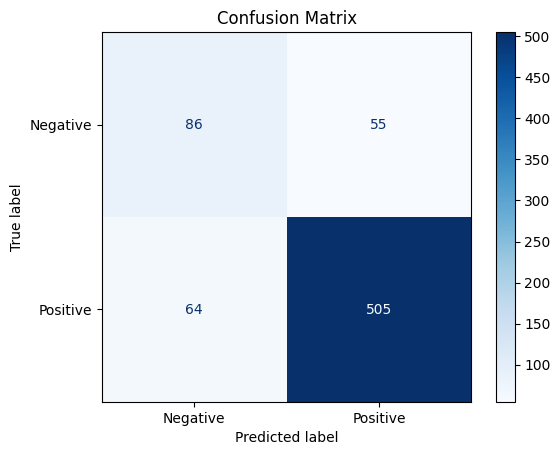

Unique train scores: [0.03670761 0.0483701  0.05074538 ... 0.99043433 0.9912873  0.99201666]
Unique test scores: [0.06825459 0.08356834 0.0884053  0.08843412 0.0933273  0.09821238
 0.10409789 0.11726478 0.12676043 0.13384496 0.13586634 0.1368531
 0.13867329 0.1412415  0.14191328 0.14310041 0.14398972 0.1514661
 0.16073381 0.16274668 0.16639152 0.17147145 0.17247474 0.17822213
 0.17909906 0.18054572 0.19117274 0.19275137 0.19943611 0.20093167
 0.20244421 0.20803767 0.21516765 0.22365878 0.2274112  0.23305839
 0.23656765 0.23756174 0.24853546 0.25017733 0.25174615 0.25214798
 0.25569759 0.25842711 0.26378025 0.26444253 0.26637565 0.27105727
 0.27397884 0.27614802 0.27649311 0.27783648 0.27854983 0.28486767
 0.28804466 0.28923993 0.29021788 0.29240407 0.29554747 0.30331431
 0.30810449 0.30930007 0.30983419 0.31182279 0.31409192 0.31485358
 0.3159707  0.31599587 0.32460695 0.33913316 0.33938911 0.33957989
 0.34338066 0.34429458 0.34543328 0.34554486 0.34830243 0.34922553
 0.34940926 0.3497

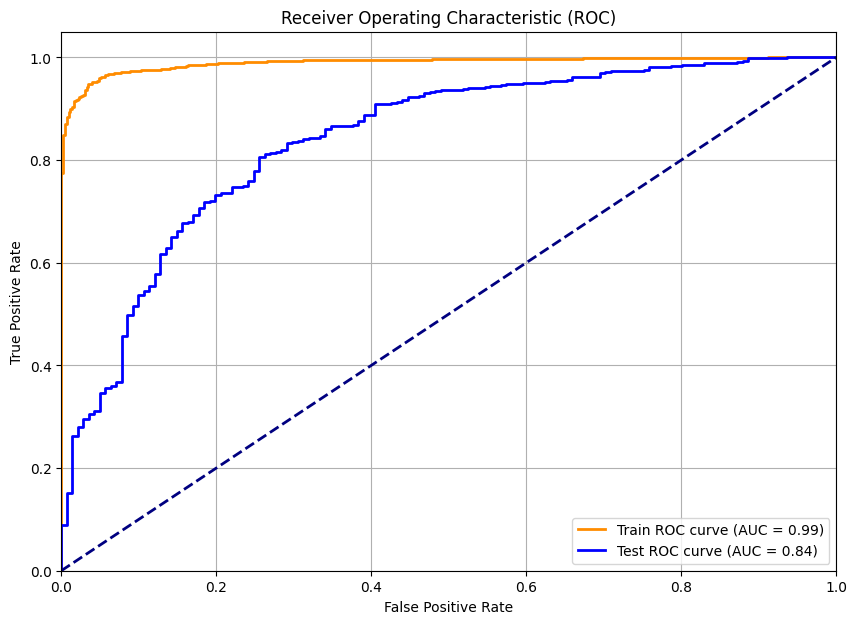

In [123]:
# Evaluate the fitted pipeline
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

The logistic regression model shows a high overall accuracy of 83%. The precision for the positive class (1) is quite high at 0.85, meaning the model is good at predicting positive sentiment tweets correctly. However, the recall for the negative class (0) is low at 0.33, indicating that many negative sentiment tweets are being misclassified as positive. The ROC AUC scores indicate the model performs well on the training data (0.99) but has a lower performance on the test data (0.84), suggesting some overfitting.

**Naive's Bayes**


In [124]:

# creating a pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         
    ('smote', SMOTE(random_state=42)),          
    ('classifier', MultinomialNB(alpha=0.01))   
])

clf_pipe.fit(X_train, y_train)



Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier', MultinomialNB(alpha=0.01))])

### Evaluating


Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.51       141
           1       0.87      0.91      0.89       569

    accuracy                           0.82       710
   macro avg       0.71      0.69      0.70       710
weighted avg       0.81      0.82      0.81       710

Confusion Matrix:
 [[ 66  75]
 [ 54 515]]


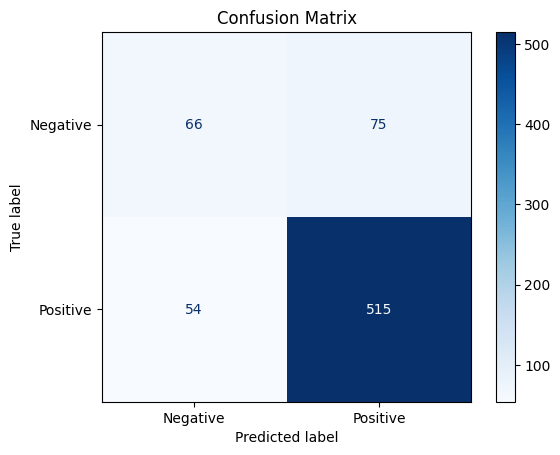

Unique train scores: [3.05367016e-08 8.31344438e-07 1.11092603e-06 ... 9.99999558e-01
 9.99999721e-01 9.99999812e-01]
Unique test scores: [1.67950402e-05 3.15825956e-05 1.28285832e-04 2.15515432e-04
 2.89699671e-04 3.54158877e-04 3.62969998e-04 4.96040591e-04
 6.28985357e-04 9.60629894e-04 1.33755105e-03 1.49705267e-03
 1.66030339e-03 3.15471460e-03 3.93172594e-03 4.70830987e-03
 6.57068406e-03 1.02739595e-02 1.16203157e-02 1.17613145e-02
 1.50026654e-02 1.55655976e-02 1.57975758e-02 2.14152639e-02
 2.22966551e-02 2.24895620e-02 2.41881633e-02 2.58364351e-02
 2.92652229e-02 2.96918194e-02 3.18780080e-02 3.66838086e-02
 3.77939969e-02 3.81182259e-02 3.92466794e-02 4.21475898e-02
 5.20010193e-02 5.23199035e-02 5.38005871e-02 5.76364698e-02
 6.25132202e-02 6.80139212e-02 8.01278684e-02 8.08070184e-02
 8.29248539e-02 8.61731330e-02 9.54257262e-02 1.23911053e-01
 1.35759309e-01 1.40505440e-01 1.44356138e-01 1.51546305e-01
 1.56693023e-01 1.57348030e-01 1.66670247e-01 1.83913352e-01
 1.85352

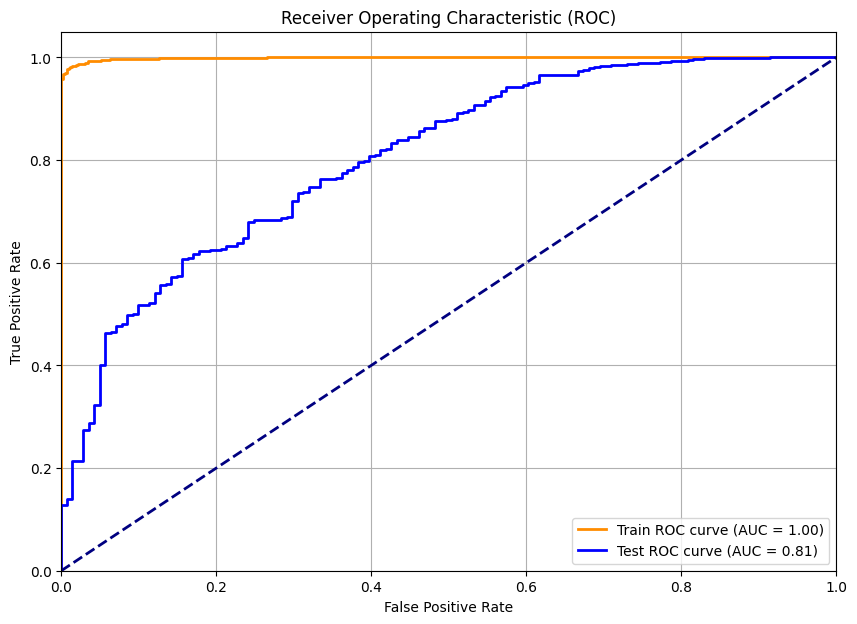

In [125]:
# Evaluate the fitted pipeline
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

The Naive Bayes model achieves an accuracy of 82%. The precision and recall for the positive class (1) are high at 0.87 and 0.91, respectively, indicating that the model is reliable for predicting positive sentiments. The recall for the negative class (0) is moderate at 0.47, showing that nearly half of the negative sentiments are correctly identified. The ROC AUC scores reveal perfect performance on the training data (1.00) and good performance on the test data (0.81), suggesting overfitting achieve better overall performance.


**Random forest**

In [126]:
#creatindg a pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         
    ('smote', SMOTE(random_state=42)),          
    ('classifier', RandomForestClassifier(     
        random_state=42,
        n_estimators=1000,
        max_depth=10,
        class_weight='balanced',
        verbose=1
    ))
])

# Fit the pipeline
clf_pipe.fit(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=1000, random_state=42,
                                        verbose=1))])

## Evaluating

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44       141
           1       0.85      0.96      0.90       569

    accuracy                           0.83       710
   macro avg       0.76      0.64      0.67       710
weighted avg       0.82      0.83      0.81       710

Confusion Matrix:
 [[ 46  95]
 [ 23 546]]


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


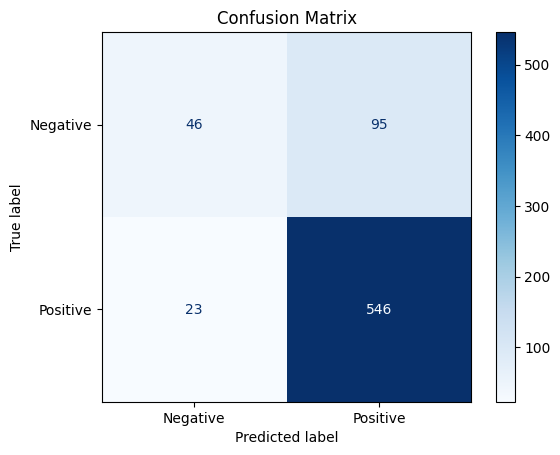

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Unique train scores: [0.28007541 0.28887334 0.29674749 ... 0.81408409 0.81832698 0.81840419]
Unique test scores: [0.31123571 0.38302169 0.38304315 0.39324997 0.39860805 0.41104373
 0.41196051 0.41278157 0.42613743 0.42821394 0.43769097 0.44192119
 0.44254012 0.44631727 0.44756891 0.44994356 0.45435988 0.45513866
 0.45604189 0.45748358 0.45931786 0.46299062 0.46611095 0.46690811
 0.46786134 0.46943097 0.46980166 0.47008695 0.47129714 0.47244215
 0.4730611  0.47307984 0.47372695 0.4743209  0.47523552 0.47524841
 0.4753005  0.47592644 0.47682771 0.47878132 0.4787877  0.47882843
 0.47908721 0.47928847 0.47937791 0.4793797  0.47956348 0.48009
 0.48126771 0.48179314 0.48227862 0.48351658 0.48366486 0.48741333
 0.48819041 0.48938069 0.49106728 0.49169779 0.49319746 0.49380129
 0.49397869 0.49493387 0.49524045 0.49737092 0.49754949 0.49761746
 0.49861142 0.49870298 0.49921282 0.5001754  0.50102695 0.50233378
 0.50280234 0.50305003 0.50321836 0.50328902 0.50464143 0.50527035
 0.505325   0.50596

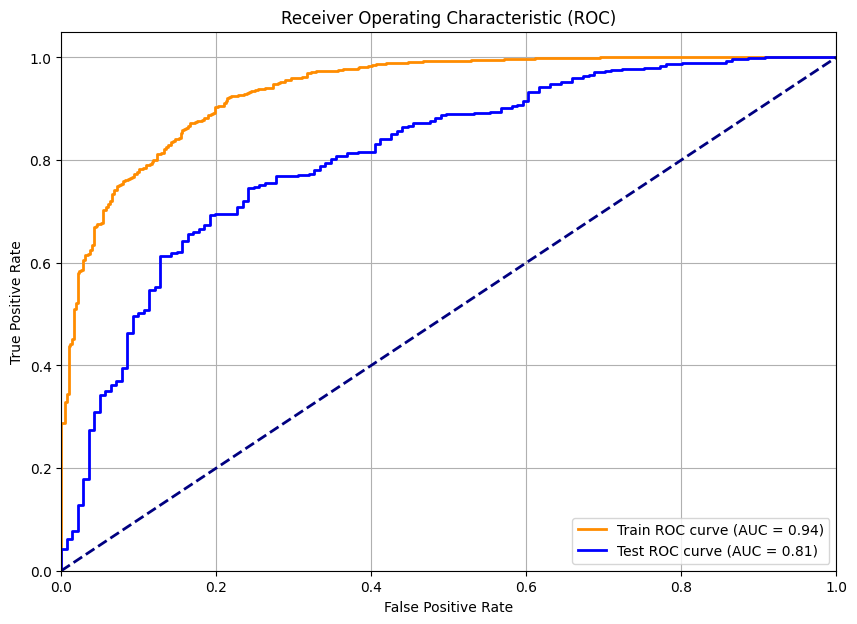

In [127]:
# Evaluate the fitted pipeline
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

The Random Forest model also achieves an overall accuracy of 83%. The precision for the positive class (1) is very high at 0.90, showing that the model is excellent at predicting positive sentiments. The recall for the negative class (0) is better than the other models at 0.61, indicating the model can correctly identify more negative sentiments. The ROC AUC scores of 0.94 for training and 0.81 for testing suggest the model generalizes reasonably well but still shows some overfitting.ce the model's overall performance.



### Summary and Recommendation

All three models show good overall performance with accuracies around 82-83%. The logistic regression model has the highest ROC AUC score on the test set (0.84), indicating it may generalize better to unseen data compared to Naive Bayes and Random Forest models. However, logistic regression also has a significant disparity between its train and test AUC scores, suggesting overfitting.

Given the performance metrics, the Naive Bayes model demonstrates a balance between precision and recall with reasonably close train and test AUC scores. Therefore, tuning the Naive Bayes model could potentially yield a more robust classifier for predicting sentiments in tweets.

## Tuned Naive Bayes

Best parameters found:  {'classifier__alpha': 0.5, 'smote__sampling_strategy': 0.5, 'vectorizer__max_df': 1.0, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}
Best cross-validation accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.31      0.46       141
           1       0.85      0.99      0.92       569

    accuracy                           0.86       710
   macro avg       0.88      0.65      0.69       710
weighted avg       0.86      0.86      0.83       710

Confusion Matrix:
 [[ 44  97]
 [  5 564]]


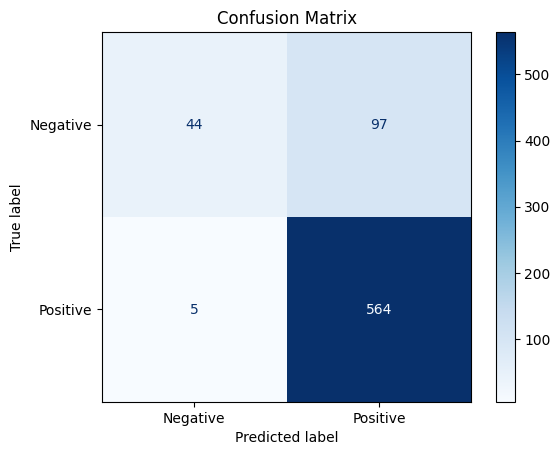

Unique train scores: [1.26472321e-04 2.01256657e-04 5.30255932e-04 ... 9.99962100e-01
 9.99968195e-01 9.99970838e-01]
Unique test scores: [9.01874278e-04 3.12813348e-03 4.53070317e-03 7.53996517e-03
 1.00735148e-02 1.87855345e-02 2.72543850e-02 2.93751315e-02
 3.21297011e-02 3.35937759e-02 4.83877027e-02 5.62723240e-02
 6.01220464e-02 7.26461035e-02 7.35673633e-02 7.78189636e-02
 8.33326436e-02 1.03759243e-01 1.07703812e-01 1.29166199e-01
 1.57683454e-01 1.66537322e-01 1.70489014e-01 1.74920365e-01
 1.81050309e-01 1.85334978e-01 2.22289047e-01 2.29412222e-01
 2.61837287e-01 2.64232686e-01 2.89578885e-01 3.03437818e-01
 3.05591092e-01 3.10033261e-01 3.29472329e-01 3.35238569e-01
 3.58626189e-01 3.59098378e-01 3.69451776e-01 3.88445360e-01
 3.92427185e-01 3.97448034e-01 4.18898766e-01 4.54754970e-01
 4.56044282e-01 4.64572332e-01 4.87025584e-01 4.96483591e-01
 4.99835604e-01 5.12205859e-01 5.14614400e-01 5.17419331e-01
 5.26041992e-01 5.31440193e-01 5.37874066e-01 5.43215474e-01
 5.50036

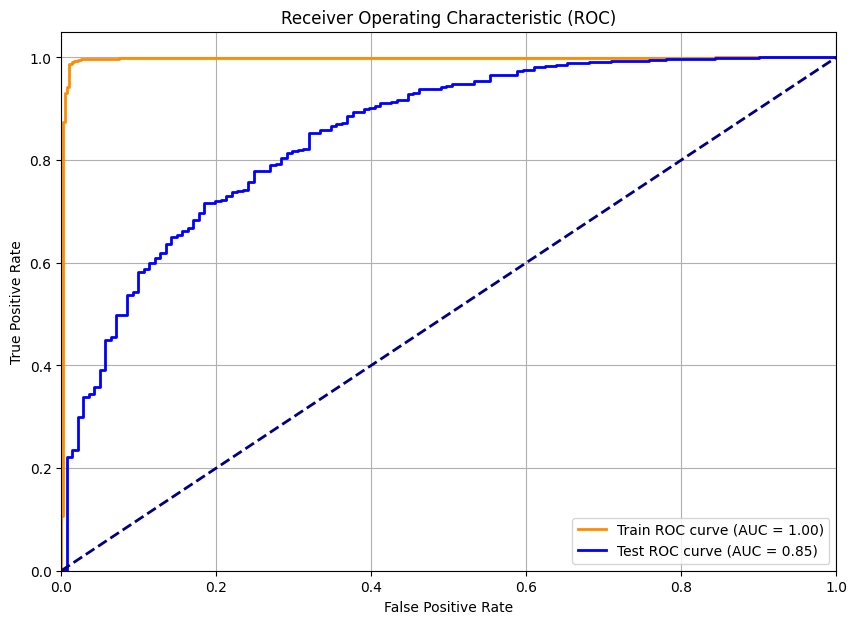

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid = {
    'vectorizer__max_df': [0.75, 1.0],
    'vectorizer__min_df': [1, 5],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'smote__sampling_strategy': [0.5, 1.0],
    'classifier__alpha': [0.01, 0.1, 0.5, 1.0]
}

# Create a pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         
    ('smote', SMOTE(random_state=42)),          
    ('classifier', MultinomialNB())   
])

# Perform grid search
grid_search = GridSearchCV(clf_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
evaluate_classification(best_model, X_train, y_train, X_test, y_test)


### Tuned Multinomial Naive Bayes Evaluation Report


The Multinomial Naive Bayes model achieved an accuracy of 86% on the test set. The model’s performance in distinguishing between positive and negative sentiments was evaluated using several metrics:

- **Positive Class**: The precision was 0.85, recall was 0.99, and the F1-score was 0.92. This indicates the model is highly effective at identifying positive sentiments.
- **Negative Class**: The precision was 0.90, recall was 0.31, and the F1-score was 0.46. This shows that while the model is fairly precise in identifying negative sentiments, it has difficulty in accurately detecting them.

The confusion matrix revealed that the model correctly classified 44 negative instances and 564 positive instances. However, it misclassified 97 negative instances as positive and 5 positive instances as negative.

The ROC AUC score for the training set was 1.0, reflecting perfect performance on the training data. The ROC AUC score for the test set was 0.85, suggesting strong generalization to unseen data but slightly lower performance compared to the training set.

**Best Hyperparameters:**
- **Alpha**: 0.5
- **SMOTE Sampling Strategy**: 0.5
- **TF-IDF Vectorizer Max DF**: 1.0
- **TF-IDF Vectorizer Min DF**: 1
- **TF-IDF Vectorizer N-gram Range**: (1, 2)

In summary, the Multinomial Naive Bayes model shows strong performance in identifying positive sentiments and has a perfect fit on the training data. The model’s performance on negative sentiment detection is weaker, as indicated by the lower recall for negative sentiments and the confusion matrix. The selected hyperparameters, including the alpha for smoothing, SMOTE sampling strategy, and TF-IDF vectorizer settings, have been tuned to optimize model performance.

## Multi Class

In [ ]:
df["emotion_encoded"]

In [132]:
#split our data into test split
#vectorizer = TfidfVectorizer()

X = combined_df['lemmatized_tweet']
y = combinedf['emotion_encoded']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

# Split the data
X = combined_df['lemmatized_tweet']
y = combined_df['emotion_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         
    ('smote', SMOTE(random_state=42)),          
    ('classifier', MultinomialNB())   
])

# Fit the pipeline
clf_pipe.fit(X_train, y_train)

# Make predictions
y_pred = clf_pipe.predict(X_test)

# Check shapes again
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))



NameError: name 'combined_df' is not defined


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.29      0.53      0.38       157
     Class 1       0.76      0.58      0.66      1329
     Class 2       0.50      0.63      0.56       748

    accuracy                           0.59      2234
   macro avg       0.52      0.58      0.53      2234
weighted avg       0.64      0.59      0.61      2234



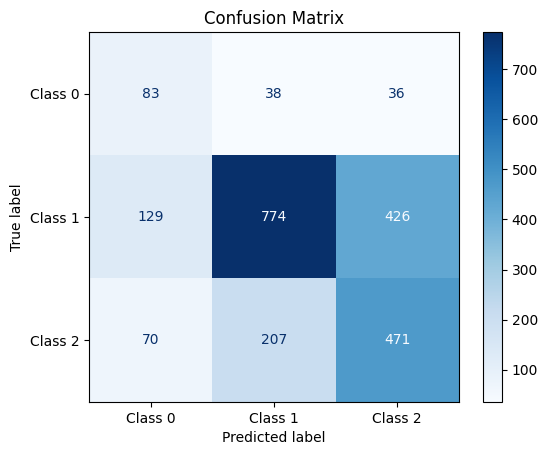

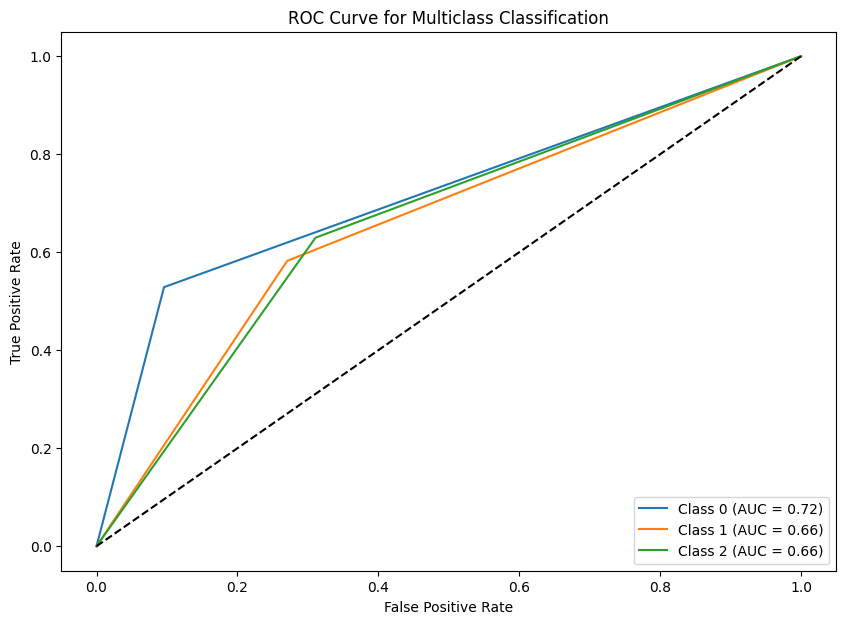

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Classification Report
target_names = ['Class 0', 'Class 1', 'Class 2']
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=target_names)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC AUC for multiclass classification
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

plt.figure(figsize=(10, 7))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


### Multiclass Classification Evaluation Report

#### Confusion Matrix:
The confusion matrix reveals the following insights:

- **Class 0:**
  - The model correctly identified 53% of Class 0 instances but had a low precision, indicating high misclassification.

- **Class 1:**
  - The model shows a higher precision for Class 1, meaning it correctly predicted Class 1 instances more often. However, the recall is relatively lower, suggesting some Class 1 instances were missed.

- **Class 2:**
  - The model performed moderately well for Class 2 with a reasonable recall and precision. Misclassification of Class 2 instances was noticeable but less severe than for Class 0.

#### ROC AUC Scores:
- **Class 0:** 0.72
  - AUC of 0.72 suggests the model has a good ability to distinguish Class 0 from the other classes.
  
- **Class 1 and Class 2:** 0.66 each
  - AUC of 0.66 indicates the model has a moderate ability to differentiate these classes from the others.

#### Summary:
The model shows mixed performance across different classes. It has relatively high recall for Class 1 but struggles with precision and recall for Class 0. The overall accuracy is 59%, with macro and weighted averages indicating moderate performance across all classes.

The ROC AUC scores reflect the model’s capability to distinguish between classes, with Class 0 showing the best performance. Further tuning and model improvements are recommended, especially for better classification of Class 0 and balancing precision-recall trade-offs across all classes.


## Tuned Model

In [142]:
param_grid = {
    'preprocessor__tfidf__ngram_range': [(1, 1), (1, 2)],
    'smote__sampling_strategy': ['auto', 'minority'],  # or specify a dict for specific ratios
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'classifier__fit_prior': [True, False]
}


In [143]:
from collections import Counter
print(Counter(y_train))


Counter({1: 4059, 2: 2230, 0: 413})


In [144]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

smote = SMOTE(sampling_strategy='auto')
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', smote),
    ('clf', MultinomialNB())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE()),
                ('clf', MultinomialNB())])

In [146]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy', error_score='raise')
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


ValueError: Invalid parameter 'classifier' for estimator Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE()),
                ('clf', MultinomialNB())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [147]:
# Define the parameter grid with correct prefixes
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],    # n-gram ranges for TF-IDF
    'smote__sampling_strategy': ['auto', 'minority'],  # Sampling strategy for SMOTE
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],  # Hyperparameters for Naive Bayes
    'clf__fit_prior': [True, False]             # Whether to use class prior
}


In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define a custom scoring function if needed
scorer = make_scorer(accuracy_score)

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring=scorer)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('smote', SMOTE()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__fit_prior': [True, False],
                         'smote__sampling_strategy': ['auto', 'minority'],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(accuracy_score, response_method='predict'),
             verbose=1)

In [149]:
# 1. Print the best parameters found by GridSearchCV
print("Best Parameters Found:")
print(grid_search.best_params_)

# 2. Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# 3. Print the best score achieved during the grid search
print("Best Score Achieved:")
print(grid_search.best_score_)

# 4. View detailed results of all parameter combinations tested
import pandas as pd

# Convert the cross-validation results to a DataFrame for easy viewing
results = pd.DataFrame(grid_search.cv_results_)

# Print selected columns to see the results of the grid search
print(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

# 5. Evaluate the best model on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print the classification report to see precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix to see the number of true positives, false positives, etc.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score of the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# 6. Save the best model for future use
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

# To load the saved model later
# loaded_model = joblib.load('best_model.pkl')


Best Parameters Found:
{'clf__alpha': 0.1, 'clf__fit_prior': True, 'smote__sampling_strategy': 'minority', 'tfidf__ngram_range': (1, 2)}
Best Score Achieved:
0.6544336483132436
                                               params  mean_test_score  \
0   {'clf__alpha': 0.0001, 'clf__fit_prior': True,...         0.615941   
1   {'clf__alpha': 0.0001, 'clf__fit_prior': True,...         0.629962   
2   {'clf__alpha': 0.0001, 'clf__fit_prior': True,...         0.642947   
3   {'clf__alpha': 0.0001, 'clf__fit_prior': True,...         0.644735   
4   {'clf__alpha': 0.0001, 'clf__fit_prior': False...         0.617581   
5   {'clf__alpha': 0.0001, 'clf__fit_prior': False...         0.631008   
6   {'clf__alpha': 0.0001, 'clf__fit_prior': False...         0.621908   
7   {'clf__alpha': 0.0001, 'clf__fit_prior': False...         0.632051   
8   {'clf__alpha': 0.001, 'clf__fit_prior': True, ...         0.617135   
9   {'clf__alpha': 0.001, 'clf__fit_prior': True, ...         0.629216   
10  {'clf

['best_model.pkl']

# Model Performance Interpretation

## Best Parameters
- **`clf__alpha`:** 0.1  
  Regularization parameter for the Naive Bayes model. A value of 0.1 indicates a balanced approach to regularization.

- **`clf__fit_prior`:** True  
  Indicates that class prior probabilities are used, which can enhance model performance if training data is representative.

- **`smote__sampling_strategy`:** 'minority'  
  SMOTE is used to oversample the minority class, improving the balance in the dataset.

- **`tfidf__ngram_range`:** (1, 2)  
  Includes both unigrams and bigrams in the TF-IDF vectorizer, capturing more contextual information.

## Best Score Achieved
- **Accuracy:** 0.654  
  The model achieved an accuracy of 65.4%, meaning it correctly predicted the class for approximately 65.4% of the samples.


## Interpretation

### Class 0 (Negative Emotion)

- **True Negatives:** 63  
  The number of correctly identified negative emotion tweets that were truly negative.

- **False Positives:** 68  
  The number of tweets incorrectly identified as negative emotion when they are not.

- **False Negatives:** 26  
  The number of negative emotion tweets that were incorrectly classified as non-negative.

**Interpretation:**  
The model has difficulties correctly classifying negative emotion tweets and often confuses them with other classes.

### Class 1 (Positive Emotion)

- **True Positives:** 1077  
  The number of correctly identified positive emotion tweets that were truly positive.

- **False Negatives:** 62  
  The number of positive emotion tweets that were incorrectly classified as non-positive.

**Interpretation:**  
The model performs well in identifying positive emotion tweets but still misclassifies some.

### Class 2 (Neutral Emotion)

- **True Positives:** 345  
  The number of correctly identified neutral emotion tweets that were truly neutral.

- **False Positives:** 362  
  The number of tweets incorrectly identified as neutral emotion when they are not.

- **False Negatives:** 41  
  The number of neutral emotion tweets that were incorrectly classified as non-neutral.

**Interpretation:**  
The model struggles with neutral emotion, frequently misclassifying these tweets as other classes.

## Summary

The Multinomial Naive Bayes model with SMOTE and TF-IDF performs well in identifying positive emotions but shows weaknesses in identifying negative and neutral emotions. The confusion matrix indicates frequent misclassification between negative and neutral emotions. To improve, consider enhancing feature engineering, experimenting with different models, and exploring alternative class imbalance techniques.


### Neural network

ValueError: could not convert string to float: 'guy get tattooed company logo win ipad link sxsw'

<7273x53538 sparse matrix of type '<class 'numpy.float64'>'
	with 230111 stored elements in Compressed Sparse Row format>

In [197]:
print("Unique labels in training data:", np.unique(y_train_smote))
print("Unique labels in test data:", np.unique(y_test))


Unique labels in training data: [0 1 2 3]
Unique labels in test data: [0 1 2 3]


In [198]:
def create_dnn_model(input_dim, num_classes):
    model = Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Adjust to number of classes
    ])

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model


In [199]:
num_classes = len(np.unique(y_train_smote))
model = create_dnn_model(input_dim, num_classes)


In [200]:
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label mapping: {"I can't tell": 0, 'Negative emotion': 1, 'No emotion toward brand or product': 2, 'Positive emotion': 3}


In [201]:
# Check unique labels in training and test sets
print("Unique labels in training data:", np.unique(y_train_smote))
print("Unique labels in test data:", np.unique(y_test))


Unique labels in training data: [0 1 2 3]
Unique labels in test data: [0 1 2 3]


In [204]:
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8770 - loss: 0.3109
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8814 - loss: 0.3084
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8893 - loss: 0.2852
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8926 - loss: 0.2707
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9020 - loss: 0.2577
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9071 - loss: 0.2417
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9040 - loss: 0.2432
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9194 - loss: 0.2146
Epoch 9/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9182 - loss: 0.2110
Epoch 10/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9218 - loss: 0.2102
Epoch 11/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9209 - loss: 0.2029
Epoch 12/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [205]:
# Predict on the test data
y_pred = model.predict(X_test_tfidf_reduced)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Print classification report which includes precision, recall, f1-score, and support for each class
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Print confusion matrix to show the number of true positive, true negative, false positive, and false negative predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Print accuracy score to show the proportion of correctly classified instances
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_classes))


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        27
                  Negative emotion       0.51      0.33      0.40       121
No emotion toward brand or product       0.74      0.74      0.74      1065
                  Positive emotion       0.57      0.62      0.60       606

                          accuracy                           0.67      1819
                         macro avg       0.46      0.42      0.44      1819
                      weighted avg       0.66      0.67      0.66      1819

Confusion Matrix:
[[  0   1  14  12]
 [  4  40  53  24]
 [  6  23 792 244]
 [  4  14 210 378]]
Accuracy Score:
0.6652006597031336


**Deeplearning with neura network**

In [162]:
n_network_df = combined_df.copy()
from nltk import FreqDist, regexp_tokenize
# Pattern to capture words with apostrophes as one token
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# Casting tweet_text to string or the tokenization doesn't work
n_network_df['tweet'] = n_network_df['tweet'].astype('str')

# Tokenizing tweets and inserting into df
n_network_df['raw_tokens'] = n_network_df['tweet'].map(lambda x: regexp_tokenize(x, pattern))

# Lowercase all tokens
n_network_df['raw_tokens'] = n_network_df['raw_tokens'].map(lambda x: [y.lower() for y in x])

In [163]:
#listing the stop words and creating a column in dataframe
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',
           'apple', 'iphone', 'ipad', 'google', 'android', 'sxsw',
           '\'s', '2', 'rt']
n_network_df['raw_tokens_stopped'] = n_network_df['raw_tokens'].map(lambda x: [y for y in x if y not in stopwords_list])

In [164]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

# tokenize and pad the sequence the tweets
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(n_network_df['raw_tokens_stopped']))
list_tokenized = tokenizer.texts_to_sequences(n_network_df['raw_tokens_stopped'])
X_values = pad_sequences(list_tokenized, maxlen=100)

In [165]:
y_values = pd.get_dummies(n_network_df['emotion']).values


In [166]:
# Implement train/test split of dataset
X_train_tk, X_test_tk,y_train_tk,y_test_tk = train_test_split(X_values,y_values,
                                                            test_size=0.25,
                                                            random_state=42)

In [167]:
model = Sequential()

embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#compiling the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [168]:
history = model.fit(
    X_train_tk, y_train_tk,
    epochs=20,  # Increase epochs
    batch_size=64,  # Experiment with batch size
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]  # Add callbacks
)

NameError: name 'early_stopping' is not defined

In [169]:
train_score = model.evaluate(X_train_tk, y_train_tk)
test_score = model.evaluate(X_test_tk, y_test_tk)
print('Train score:', train_score)
print('Test Score:', test_score)

210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3369 - loss: 1.0964
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3435 - loss: 1.0963
Train score: [1.09646737575531, 0.3357206881046295]
Test Score: [1.0964549779891968, 0.33795881271362305]


In [170]:
#tuning the sequantial model
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPool1D, Dropout, Dense
import numpy as np

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lstm_units=25, dense_units=50, dropout_rate=0.5, epochs=10, batch_size=32):
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def create_model(self):
        model = Sequential([
            Embedding(20000, 128, input_length=X_train_tk.shape[1]),
            LSTM(self.lstm_units, return_sequences=True),
            GlobalMaxPool1D(),
            Dropout(self.dropout_rate),
            Dense(self.dense_units, activation='relu'),
            Dropout(self.dropout_rate),
            Dense(3, activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.create_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))

# Set up GridSearchCV
param_grid = {
    'lstm_units': [25, 50],
    'dense_units': [50, 100],
    'dropout_rate': [0.3, 0.5],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

grid = GridSearchCV(
    estimator=KerasClassifierWrapper(),
    param_grid=param_grid,
    cv=3,
    n_jobs=1,
    verbose=1
)

# Fit the grid search
grid_result = grid.fit(X_train_tk, y_train_tk)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Get the best model
best_model = grid.best_estimator_.model







Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\Ian\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 10800s 157s/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/s

KeyboardInterrupt: 